In [18]:
import os
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def format_dict(job0):
    tmp = job0['config']
    tmp['acc'] = job0['acc'][-1]
    tmp['val_acc'] = job0['val_acc'][-1]
    tmp['Top2'] = job0['val_Top2'][-1]
    tmp['val_Top2'] = job0['val_Top2'][-1]
    tmp['Top3'] = job0['Top3'][-1]
    tmp['val_Top3'] = job0['val_Top3'][-1]
    return tmp

In [20]:

def get_summary(root,print_summary=False,return_dframe=False):
    job_list = []
    started=0
    not_started=0
    accs={}
    dataframe={}
    for job in os.listdir(os.path.join(root,'jobs')):
        if 'job' in job:
            try: 
                filename = os.listdir(os.path.join(root,'jobs',job,'logs'))[0]            
                f = open(os.path.join(root,'jobs',job,'logs',filename),"r")
                job0 = json.loads(f.read())
                f.close()
                dataframe[job]=format_dict(job0)

                started+=1
            except:
                not_started+=1
    print('Number of jobs started:%d'%(started))
    print('Number of jobs pending:%d'%(not_started))

    dataframe = pd.DataFrame.from_dict(dataframe)
    #dataframe.to_csv('summary.csv')
    if print_summary:
        try: print(dataframe)
        except: print("couldn't load a dataframe")
    if return_dframe: return dataframe.T
    else: pass

In [21]:
root = 'Shiriu'
dframe = get_summary(root,return_dframe=True)

Number of jobs started:20
Number of jobs pending:30


In [22]:
dframe.columns

Index(['Top2', 'Top3', 'acc', 'architecture', 'batch_size', 'decay',
       'dense_layer_size', 'dropout', 'epochs', 'img_input_size',
       'learning_rate', 'mode', 'momentum', 'nesterov', 'num_classes',
       'num_layers', 'optimizer', 'reg_rate', 'test_dir', 'train_dir',
       'val_Top2', 'val_Top3', 'val_acc', 'val_dir'],
      dtype='object')

In [23]:
dframe[['architecture','val_Top2']]

,architecture,val_Top2
job0001,vgg16,0.839636
job0003,vgg16,0.825275
job0004,vgg19,0.786501
job0005,vgg16,0.847295
job0007,vgg19,0.832934
job0008,vgg16,0.363332
job0009,vgg19,0.741024
job0010,vgg16,0.502633
job0011,vgg16,0.749641
job0014,vgg19,0.79416


In [22]:
pd.to_numeric(dframe['learning_rate']).describe()


count    14.000000
mean      0.000096
std       0.000233
min       0.000002
25%       0.000012
50%       0.000025
75%       0.000061
max       0.000896
Name: learning_rate, dtype: float64

In [23]:
2e-6

2e-06

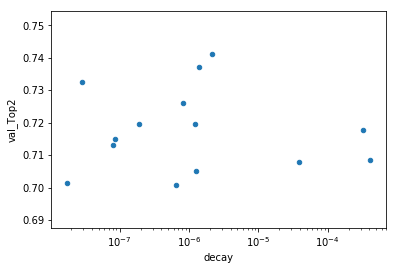

In [18]:
visualize(dframe,'decay','val_Top2')

## Visualization

In [13]:
def visualize(dframe,field,target):
    dframe[target] = pd.to_numeric(dframe[target])
    if type(dframe[field][0])!= str: 
        dframe[field] = pd.to_numeric(dframe[field])
        dframe.plot.scatter(x=field,y=target,logx=True)
        #plt.scatter(x=dframe[field],y=dframe[target],logx=True)
    else:
        print(dframe.groupby(field).mean()[target])
    pass

In [15]:
field = 'architecture'
target = 'val_Top2'
visualize(dframe,field,target)

architecture
vgg16    0.730972
vgg19    0.698420
Name: val_Top2, dtype: float64


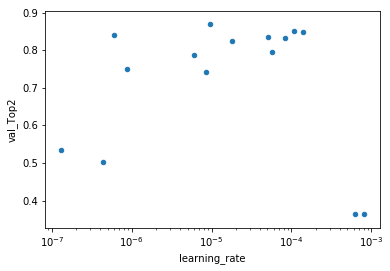

In [17]:
field = 'learning_rate'
target = 'val_Top2'
visualize(dframe,field,target)